In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal as sg

In [3]:
def convolution(fileName):
    img = plt.imread(fileName)
    print "Image Size: ", img.shape
    plt.figure()
    plt.title("Original Image")
    plt.imshow(img)
    
    #Black-White Image
    # Dot Prod by [0.299, 0.587, 0.114] makes it Black and White
    bw_img = np.dot(img, [0.299, 0.587, 0.114])
    plt.figure()
    print "Grayscale Image Size: ", bw_img.shape
    plt.title('Grayscale Image')
    plt.imshow(bw_img, cmap = plt.get_cmap('gray'))
    
    vertical_edge_kernel = np.array([[1., -1.]])
    horizontal_edge_kernel = np.array([[1.],[-1.]])
    edge_kernel = np.array([[-1., -1., -1.], [-1., 8., -1.],[ -1., -1., -1.]])
    
    ver_output = sg.convolve(bw_img, vertical_edge_kernel)
    hor_output = sg.convolve(bw_img, horizontal_edge_kernel)
    edge_output = sg.convolve(bw_img, edge_kernel)
    plt.figure()
    plt.title('Vertical Edges')
    plt.imshow(ver_output, cmap=plt.get_cmap('gray'))
    plt.figure()
    plt.title('Horizontal Edges')
    plt.imshow(hor_output, cmap=plt.get_cmap('gray'))
    plt.figure()
    plt.title('Edges')
    plt.imshow(edge_output, cmap=plt.get_cmap('gray'))


Image Size:  (354, 650, 3)
Grayscale Image Size:  (354, 650)


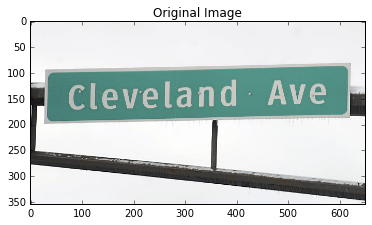

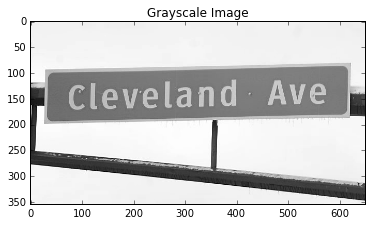

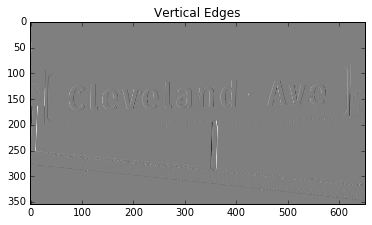

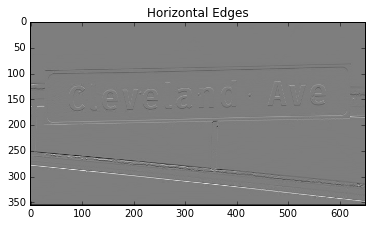

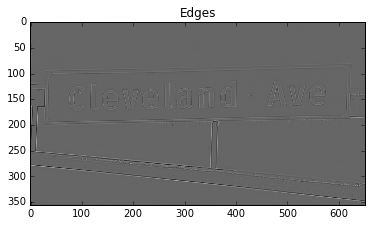

In [4]:
convolution("cleveland.jpg")

Image Size:  (815, 1226, 3)
Grayscale Image Size:  (815, 1226)


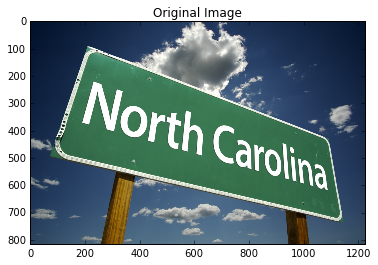

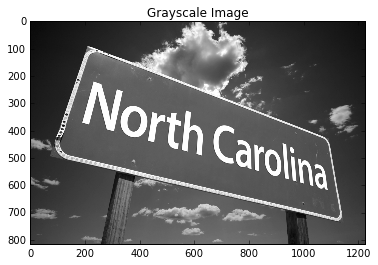

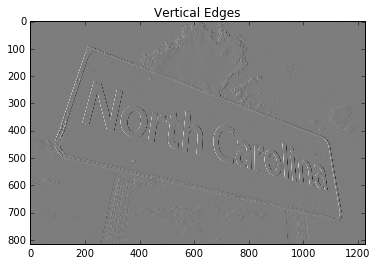

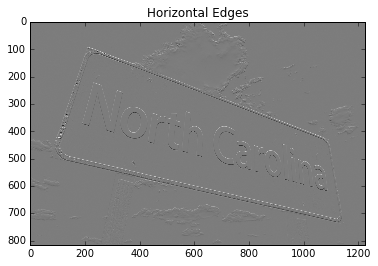

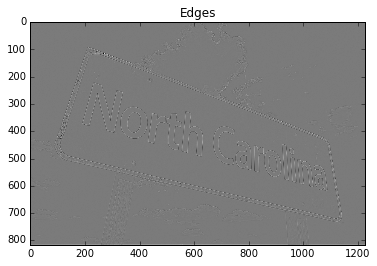

In [5]:
convolution("ncarolina.jpg")